In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import animation, colors
from sklearn.cluster import KMeans
from sklearn import preprocessing as sk_preprocessing
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation

In [2]:
pressure = '/Users/votri/Downloads/DSDA 385 Machine Learning/Final Project - Climate Change/Pressure/MinMaxNormWithLabel/'

wind = '/Users/votri/Downloads/DSDA 385 Machine Learning/Final Project - Climate Change/CESMU200/MinMaxNormWithLabel/'

# Get the list of subfolders
subfolders = [subfolder for subfolder in os.listdir(pressure) if os.path.isdir(os.path.join(pressure, subfolder))]

dfs_pressure = []
dfs_wind = []
reshaped_arrays = []
folder_names = []

for subfolder in subfolders:
    pressure_path = os.path.join(pressure, subfolder)
    wind_path = os.path.join(wind, subfolder)
    files = [f for f in os.listdir(pressure_path) if f.endswith('.csv')]
    for file in files:
        # pressure data
        pressure_file_path = os.path.join(pressure_path, file)
        df_pressure = pd.read_csv(pressure_file_path, header=None)
        df_pressure = np.array(df_pressure)
        dfs_pressure.append(df_pressure)
        
        # wind data
        wind_file_path = os.path.join(wind_path, file)
        df_wind = pd.read_csv(wind_file_path, header=None)
        df_wind = np.array(df_wind)
        dfs_wind.append(df_wind)
        
        # stack 2 arrays
        df = np.dstack((df_pressure, df_wind))
        (h,w,c) = df.shape
        df_2D = df.reshape(h*w,c) # reshape df to 2D
        
        reshaped_array = np.reshape(df, (1,-1)) # Reshape the dataframe into a 1D array with 225 attributes
        reshaped_arrays.append(reshaped_array)  # Append the reshaped array to the list
        
        folder_names.append(subfolder) # Save the class of the image
        
# Concatenate the reshaped arrays into a single array
concatenated_array = np.concatenate(reshaped_arrays, axis=0)

# Convert the concatenated array into a dataframe
result_df = pd.DataFrame(concatenated_array)
result_df['Class'] = folder_names

In [3]:
print(result_df)
result_df.describe()

            0         1         2         3         4         5         6  \
0    0.139692  0.000000  0.139077  0.000000  0.137846  0.000000  0.137231   
1    0.475692  0.222222  0.473846  0.218182  0.471385  0.196429  0.468923   
2    0.248615  0.106383  0.243692  0.083333  0.240000  0.062500  0.237538   
3    0.248615  0.106383  0.243692  0.083333  0.240000  0.062500  0.237538   
4    0.293538  0.208333  0.284923  0.163265  0.278154  0.120000  0.272615   
..        ...       ...       ...       ...       ...       ...       ...   
732  0.844923  0.400000  0.857231  0.312500  0.872615  0.272727  0.886154   
733  0.912615  0.205882  0.915692  0.228571  0.923692  0.184211  0.929846   
734  0.931077  0.305556  0.933538  0.315068  0.931692  0.328767  0.931692   
735  0.868923  0.603774  0.875077  0.509091  0.880000  0.413793  0.883692   
736  0.856000  0.028986  0.864000  0.014706  0.874462  0.058824  0.876923   

            7         8         9  ...       441       442       443  \
0  

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,...,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,0.653576,0.304457,0.652917,0.293300,0.652001,0.282113,0.650932,0.271847,0.649845,0.263561,...,0.643169,0.476756,0.647061,0.472584,0.652169,0.468764,0.658171,0.465328,0.664773,0.463245
std,0.259836,0.283046,0.261524,0.281538,0.262980,0.278370,0.264169,0.276129,0.265151,0.274591,...,0.279557,0.277604,0.279201,0.276394,0.278348,0.275974,0.277009,0.276022,0.275190,0.277787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.483692,0.062500,0.480000,0.056604,0.478769,0.053333,0.473846,0.051282,0.468308,0.041667,...,0.447385,0.265306,0.451077,0.254902,0.459692,0.254902,0.467692,0.256410,0.478154,0.250000
50%,0.719385,0.211538,0.721231,0.188679,0.721231,0.181818,0.716923,0.163636,0.710769,0.156250,...,0.709538,0.518072,0.713231,0.500000,0.719385,0.500000,0.726154,0.488372,0.736000,0.472727
75%,0.882462,0.514286,0.888615,0.490566,0.894769,0.486486,0.899692,0.437500,0.901538,0.424242,...,0.903385,0.687500,0.910154,0.690141,0.916308,0.681319,0.918769,0.674157,0.922462,0.673077
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.995077,1.000000,0.992000,1.000000,0.988308,1.000000,0.986462,1.000000,0.987692,1.000000


In [4]:
counts = result_df['Class'].value_counts()
print(counts)

COL     327
CL      178
COH     161
NROI     71
Name: Class, dtype: int64


In [5]:
X = result_df.drop('Class', axis = 1)
Y = result_df['Class']

Y_numerized = Y.replace({'CL': 0, 'COL' : 2, 'COH': 3, 'NROI': 1})
print(Y_numerized)

0      0
1      0
2      0
3      0
4      0
      ..
732    1
733    1
734    1
735    1
736    1
Name: Class, Length: 737, dtype: int64


In [6]:
# Helper functions

# Data Normalization
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [7]:
#mian function

train_x_norm = minmax_scaler(X) 
data = minmax_scaler(X) 
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)

accuracies = []

In [8]:
# hyperparameters  
grid = [[15, 15]]
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(150001)
loop = [500, 1000, 5000, 10000, 20000, 50000, 75000, 100000, 125000, 150000]

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [9]:
for j in range(len(grid)):
  num_rows = grid[j][0]
  num_cols = grid[j][1]
  som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction
  print(f"Grid size: {num_rows} x {num_cols}")
    
  for step in range(max_steps):
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)
    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    
    for row in range(num_rows):
      for col in range(num_cols):
        if m_distance([row,col],winner) <= neighbourhood_range:
          som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight
        
    for i in loop:
      if step == i:
        label_data = np.array(Y_numerized)
        map = np.empty(shape=(num_rows, num_cols), dtype=object)

        for row in range(num_rows):
          for col in range(num_cols):
            map[row][col] = [] # empty list to store the label

        for t in range(train_x_norm.shape[0]):
          winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
          map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
        
        label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
        for row in range(num_rows):
          for col in range(num_cols):
            label_list = map[row][col]
            if len(label_list)==0:
              label = 2
            else:
              label = max(label_list, key=label_list.count)
            label_map[row][col] = label
        
        winner_labels = []

        for t in range(data.shape[0]):
          winner = winning_neuron(data, t, som, num_rows, num_cols)
          row = winner[0]
          col = winner[1]
          predicted = label_map[row][col]
          winner_labels.append(predicted)
        
        accuracy = accuracy_score(Y_numerized, np.array(winner_labels))
        print(f"- Accuracy at iteration {i}:", accuracy)
        accuracies.append(accuracy)
    
  print()

Grid size: 15 x 15
- Accuracy at iteration 500: 0.858887381275441
- Accuracy at iteration 1000: 0.8548168249660787
- Accuracy at iteration 5000: 0.8575305291723202
- Accuracy at iteration 10000: 0.8548168249660787
- Accuracy at iteration 20000: 0.8697421981004071
- Accuracy at iteration 50000: 0.8873812754409769
- Accuracy at iteration 75000: 0.8778833107191316
- Accuracy at iteration 100000: 0.8833107191316146
- Accuracy at iteration 125000: 0.8968792401628223
- Accuracy at iteration 150000: 0.8941655359565808



In [10]:
#print(accuracies)
best_accuracy_som = max(accuracies)
print(f'The best accuracy for SOM is {round(best_accuracy_som*100, 2)}%')
index = accuracies.index(best_accuracy_som)
grid_size = grid[math.floor(index/10)]
best_iteration = loop[index%10]
print(f'The best grid size is {grid_size} at iteration {best_iteration}')

The best accuracy for SOM is 89.69%
The best grid size is [15, 15] at iteration 125000


In [11]:
cm = confusion_matrix(Y_numerized, np.array(winner_labels))
print(cm)

[[168   0  10   0]
 [  0  48  18   5]
 [ 35   7 284   1]
 [  1   0   1 159]]


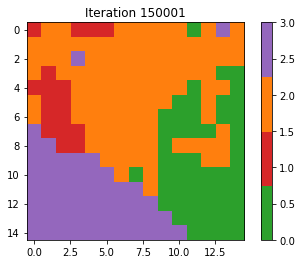

In [12]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange', 'tab:purple'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()